В данной лабораторной работе используется датасет [seeds](https://archive.ics.uci.edu/ml/datasets/seeds#), в котором содержатся геометрические параметры семени 3 видов пшениц (по 70 наблюдений каждого вида).

Нужно решить задачу кластеризации с помощью алгоритма [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means) ([пример вузиализации](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import completeness_score, homogeneity_score

In [2]:
seeds = pd.read_csv('seeds.csv')
seeds.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Убираем из данных признак wheat_class
cluster_data = seeds.drop(columns=['wheat_class'])
cluster_data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
n_clusters = 3

In [5]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [6]:
h_score = homogeneity_score(seeds.wheat_class, kmeans.labels_)
c_score = completeness_score(seeds.wheat_class, kmeans.labels_)
print('Homogeneity score: {:.3f}'.format(h_score))
print('Completeness score: {:.3f}'.format(c_score))

Homogeneity score: 0.693
Completeness score: 0.696


In [7]:
reduced_data = PCA(n_components=2).fit_transform(cluster_data)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

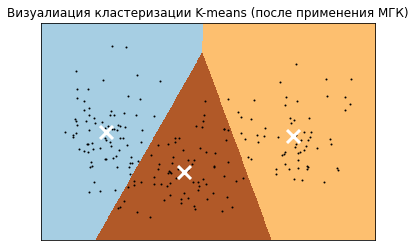

In [8]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
# Строит треугольники
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Визуалиация кластеризации K-means (после применения МГК)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()